### Optimisation of a Neocortical Layer 5 Pyramidal Cell

This notebook shows you how to optimise the maximal conductance of Neocortical Layer 5 Pyramidal Cell as used in Markram et al. 2015.

Author of this script: Werner Van Geit @ Blue Brain Project

Choice of parameters, protocols and other settings was done by Etay Hay @ HUJI

What's described here is a more advanced use of BluePyOpt. We suggest to first go through the introductary example here: https://github.com/BlueBrain/BluePyOpt/blob/master/examples/simplecell/simplecell.ipynb

If you use the methods in this notebook, we ask you to cite the following publications when publishing your research:

Van Geit, W., M. Gevaert, G. Chindemi, C. Rössert, J.-D. Courcol, E. Muller, F. Schürmann, I. Segev, and H. Markram (2016, March). BluePyOpt: Leveraging open source software and cloud infrastructure to optimise model parameters in neuroscience. ArXiv e-prints. http://arxiv.org/abs/1603.00500

Markram, H., E. Muller, S. Ramaswamy, M. W. Reimann, M. Abdellah, C. A. Sanchez, A. Ailamaki, L. Alonso-Nanclares, N. Antille, S. Arsever, et al. (2015). Reconstruction and simulation of neocortical microcircuitry. Cell 163(2), 456–492. http://www.cell.com/abstract/S0092-8674%2815%2901191-5

Some of the modules loaded in this script are located in the L5PC example folder: https://github.com/BlueBrain/BluePyOpt/tree/master/examples/l5pc

We first load the bluepyopt python module, the ephys submodule and some helper functionality


## install software and data

In [1]:
 # To avoid problems, install the pacakges you will need.
! pip install --upgrade pip
! pip install json2html
! pip install -q --upgrade "hbp-service-client==1.0.0"

    100% |████████████████████████████████| 1.3MB 366kB/s ta 0:00:01
  Found existing installation: pip 9.0.1
    Uninstalling pip-9.0.1:
      Successfully uninstalled pip-9.0.1
  Running setup.py bdist_wheel for json2html ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/c8/8a/ae/daa5ab4d808a6b7f77d8fd967efd85ccf2e18364ed87b0c694
Successfully built json2html
sympy 1.0 requires mpmath>=0.19, which is not installed.
sympy 1.0 requires mpmath>=0.19, which is not installed.


### Restart your kernel now

In [1]:
!pip install PyYAML==3.10
!pip install mpmath==0.19

sympy 1.0 requires mpmath>=0.19, which is not installed.
    100% |████████████████████████████████| 501kB 3.5MB/s ta 0:00:01
  Running setup.py bdist_wheel for mpmath ... done
  Stored in directory: /home/jovyan/.cache/pip/wheels/e5/b1/8c/92ac27baf2c8ae63139bac63710a59c4b0dc64efa443117ae2
Successfully built mpmath


In [2]:
!pip -q install neurom --upgrade

### Unzip the zip directory __.zip__

In [4]:
extension = '.zip'
file_name = 'cell_optimization_L5PC' # folder name
full_name = file_name + extension
clients = get_hbp_service_client()
collab_path = get_collab_storage_path()
data_dir = collab_path + '/%s' % full_name
clients.storage.download_file(data_dir, full_name)

In [8]:
# Let's decompress the folder
!unzip -q {full_name} -d {'unziped'} # folder name

In [9]:
# Let's see what is inside the folder
!ls

cell_optimization_L5PC.zip  unziped  work


In [11]:
# For some reason when we unzip a zip file the unzip function creates another folder inside
# the unzip folder,so we have to take into account that the folder path has one more step 
# in the path to the desired file
!ls unziped/cell_optimization_L5PC #folder name/folder name/

L5PC.ipynb  model  opt_l5pc.py	opt_l5pc.sh  tmp


In [32]:
# compile the mod files
!nrnivmodl unziped/cell_optimization_L5PC/tmp/model/neoctx-L5pc/mechanisms

/home/jovyan
unziped/cell_optimization_L5PC/tmp/model/neoctx-L5pc/mechanisms/CaDynamics_E2.mod unziped/cell_optimization_L5PC/tmp/model/neoctx-L5pc/mechanisms/Ca_HVA.mod unziped/cell_optimization_L5PC/tmp/model/neoctx-L5pc/mechanisms/Ca_LVAst.mod unziped/cell_optimization_L5PC/tmp/model/neoctx-L5pc/mechanisms/Ih.mod unziped/cell_optimization_L5PC/tmp/model/neoctx-L5pc/mechanisms/Im.mod unziped/cell_optimization_L5PC/tmp/model/neoctx-L5pc/mechanisms/K_Pst.mod unziped/cell_optimization_L5PC/tmp/model/neoctx-L5pc/mechanisms/K_Tst.mod unziped/cell_optimization_L5PC/tmp/model/neoctx-L5pc/mechanisms/NaTa_t.mod unziped/cell_optimization_L5PC/tmp/model/neoctx-L5pc/mechanisms/NaTs2_t.mod unziped/cell_optimization_L5PC/tmp/model/neoctx-L5pc/mechanisms/Nap_Et2.mod unziped/cell_optimization_L5PC/tmp/model/neoctx-L5pc/mechanisms/ProbAMPANMDA_EMS.mod unziped/cell_optimization_L5PC/tmp/model/neoctx-L5pc/mechanisms/ProbGABAAB_EMS.mod unziped/cell_optimization_L5PC/tmp/model/neoctx-L5pc/mechanisms/SK_E

libtool: link: gcc -shared  -fPIC -DPIC  .libs/CaDynamics_E2.o .libs/Ca_HVA.o .libs/Ca_LVAst.o .libs/Ih.o .libs/Im.o .libs/K_Pst.o .libs/K_Tst.o .libs/NaTa_t.o .libs/NaTs2_t.o .libs/Nap_Et2.o .libs/ProbAMPANMDA_EMS.o .libs/ProbGABAAB_EMS.o .libs/SK_E2.o .libs/SKv3_1.o .libs/mod_func.o   -Wl,-rpath -Wl,/usr/local/nrn/x86_64/lib -Wl,-rpath -Wl,/usr/local/nrn/x86_64/lib -L/usr/local/nrn/x86_64/lib /usr/local/nrn/x86_64/lib/libnrnoc.so /usr/local/nrn/x86_64/lib/liboc.so /usr/local/nrn/x86_64/lib/libmemacs.so /usr/local/nrn/x86_64/lib/libscopmath.so /usr/local/nrn/x86_64/lib/libsparse13.so /usr/local/nrn/x86_64/lib/libreadline.so -lncurses /usr/local/nrn/x86_64/lib/libnrniv.so /usr/local/nrn/x86_64/lib/libivoc.so /usr/local/nrn/x86_64/lib/libneuron_gnu.so /usr/local/nrn/x86_64/lib/libmeschach.so /usr/local/nrn/x86_64/lib/libsundials.so -lm -ldl  -O2   -pthread -Wl,-soname -Wl,libnrnmech.so.0 -o .libs/libnrnmech.so.0.0.0
libtool: link: (cd ".libs" && rm -f "libnrnmech.so.0" && ln -s "libnrnm

In [33]:
%load_ext autoreload
%autoreload
import getpass
import os.path
from __future__ import print_function
import pprint
import bluepyopt
import bluepyopt.ephys as ephys
import bluepyopt as bpopt
pp = pprint.PrettyPrinter(indent=2)

Enable the code below to enable debug level logging

In [34]:
working_directory = 'unziped/cell_optimization_L5PC/tmp/model/neoctx-L5pc'

## Model description

### Morphology

We're using a complex reconstructed morphology of an L5PC cell. Let's visualise this with the BlueBrain NeuroM software:

In [39]:
from matplotlib import pyplot as plt

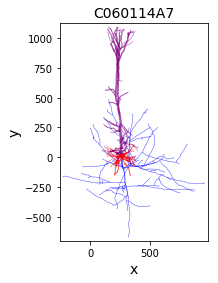

In [40]:
import neurom.viewer

neurom.viewer.draw(neurom.load_neuron(os.path.join(working_directory, 'morphology', 'C060114A7.asc')))
plt.show()

To load the morphology we create a NrnFileMorphology object. We set 'do_replace_axon' to True to replace the axon with a Axon Initial Segment.

In [41]:
morphology_filename = working_directory +'/morphology/C060114A7.asc'
morphology = ephys.morphologies.NrnFileMorphology(morphology_filename, do_replace_axon=True)

print(str(morphology))

unziped/cell_optimization_L5PC/tmp/model/neoctx-L5pc/morphology/C060114A7.asc


### Parameters

Since we have many parameters in this model, they are stored in a json file: https://github.com/BlueBrain/BluePyOpt/blob/master/examples/l5pc/config/parameters.json

In [42]:
# Example of json entry: Frozen Parameter for the equilibrum membrane potential
{
    "param_name": "e_pas",
    "sectionlist": "all",
    "type": "section",
    "dist_type": "uniform",
    "value": -75
},
# Example of json entry: Bounded Parameter
{
    "param_name": "gNaTs2_tbar_NaTs2_t",
    "mech": "NaTs2_t",
    "bounds": [
        0,
        1
    ],
    "dist_type": "uniform",
    "mech_param": "gNaTs2_tbar",
    "type": "range",
    "sectionlist": "somatic"
},

({'bounds': [0, 1],
  'dist_type': 'uniform',
  'mech': 'NaTs2_t',
  'mech_param': 'gNaTs2_tbar',
  'param_name': 'gNaTs2_tbar_NaTs2_t',
  'sectionlist': 'somatic',
  'type': 'range'},)

In [43]:
import json
param_configs = json.load(open(os.path.join(working_directory, 'config.orig/parameters.json')))

print(param_configs)

[{u'param_name': u'g_pas', u'value': 3e-05, u'type': u'section', u'dist_type': u'uniform', u'sectionlist': u'all'}, {u'param_name': u'e_pas', u'value': -75, u'type': u'section', u'dist_type': u'uniform', u'sectionlist': u'all'}, {u'param_name': u'cm', u'value': 1, u'type': u'section', u'dist_type': u'uniform', u'sectionlist': u'all'}, {u'param_name': u'Ra', u'value': 100, u'type': u'section', u'dist_type': u'uniform', u'sectionlist': u'all'}, {u'param_name': u'v_init', u'type': u'global', u'value': -65}, {u'param_name': u'celsius', u'type': u'global', u'value': 34}, {u'param_name': u'ena', u'value': 50, u'type': u'section', u'dist_type': u'uniform', u'sectionlist': u'somatic'}, {u'param_name': u'ek', u'value': -85, u'type': u'section', u'dist_type': u'uniform', u'sectionlist': u'somatic'}, {u'param_name': u'gNaTs2_tbar_NaTs2_t', u'mech': u'NaTs2_t', u'bounds': [0, 1], u'dist_type': u'uniform', u'mech_param': u'gNaTs2_tbar', u'type': u'range', u'sectionlist': u'somatic'}, {u'param_name'

In [44]:
# Let's write them as a table

print('{0:<25}: {1:<10}: {2:<15}: {3:<10}: {4:<10}'.format('Parameter Name',
                                                           'Par Type',
                                                           'Value',
                                                           'SecList',
                                                           'Distribution Type'))
print('-'*100)
for param_config in param_configs:
    
    string = '{0:<25}: {1:<10}: '.format(param_config['param_name'],
                                         param_config['type'])

    if 'value' in param_config:
        string += '{0:<15}: '.format(param_config['value'])
    elif 'range' in param_config['type']:
        string += '{0:<15}: '.format(param_config['bounds'])

    if 'sectionlist' in param_config:
        string += '{0:<10}: '.format(param_config['sectionlist'])
    else:
        string += '{0:<10}: '.format('NA')

    if 'dist_type' in param_config:
        
        string += '{0:<10}'.format(param_config['dist_type'])
    else:
        string += '{0:<10}'.format('NA')

    print(string)

Parameter Name           : Par Type  : Value          : SecList   : Distribution Type
----------------------------------------------------------------------------------------------------
g_pas                    : section   : 3e-05          : all       : uniform   
e_pas                    : section   : -75            : all       : uniform   
cm                       : section   : 1              : all       : uniform   
Ra                       : section   : 100            : all       : uniform   
v_init                   : global    : -65            : NA        : NA        
celsius                  : global    : 34             : NA        : NA        
ena                      : section   : 50             : somatic   : uniform   
ek                       : section   : -85            : somatic   : uniform   
gNaTs2_tbar_NaTs2_t      : range     : [0, 1]         : somatic   : uniform   
gSKv3_1bar_SKv3_1        : range     : [0, 1]         : somatic   : uniform   
gSK_E2bar_SK_E2        

As you can see there are two types of parameters, parameters __with a fixed value__ and parameters __with bounds__. The latter will be optimised by the algorithm.

Now we define a function that will load all the parameters in BluePyOpt Parameter objects

In [45]:
config_dir = working_directory + '/config.orig'

In [46]:
import os

def define_parameters():
    """Define parameters"""

    param_configs = json.load(open(os.path.join(config_dir, 'parameters.json')))
    parameters = []

    for param_config in param_configs:
        if 'value' in param_config:
            frozen = True
            value = param_config['value']
            bounds = None
        elif 'bounds' in param_config:
            frozen = False
            bounds = param_config['bounds']
            value = None
        else:
            raise Exception(
                'Parameter config has to have bounds or value: %s'
                % param_config)

        if param_config['type'] == 'global':
            parameters.append(
                ephys.parameters.NrnGlobalParameter(
                    name=param_config['param_name'],
                    param_name=param_config['param_name'],
                    frozen=frozen,
                    bounds=bounds,
                    value=value))
        elif param_config['type'] in ['section', 'range']:
            if param_config['dist_type'] == 'uniform':
                scaler = ephys.parameterscalers.NrnSegmentLinearScaler()
            elif param_config['dist_type'] == 'exp':
                scaler = ephys.parameterscalers.NrnSegmentSomaDistanceScaler(
                    distribution=param_config['dist'])
            seclist_loc = ephys.locations.NrnSeclistLocation(
                param_config['sectionlist'],
                seclist_name=param_config['sectionlist'])

            name = '%s.%s' % (param_config['param_name'],
                              param_config['sectionlist'])

            if param_config['type'] == 'section':
                parameters.append(
                    ephys.parameters.NrnSectionParameter(
                        name=name,
                        param_name=param_config['param_name'],
                        value_scaler=scaler,
                        value=value,
                        frozen=frozen,
                        bounds=bounds,
                        locations=[seclist_loc]))
            elif param_config['type'] == 'range':
                parameters.append(
                    ephys.parameters.NrnRangeParameter(
                        name=name,
                        param_name=param_config['param_name'],
                        value_scaler=scaler,
                        value=value,
                        frozen=frozen,
                        bounds=bounds,
                        locations=[seclist_loc]))
        else:
            raise Exception(
                'Param config type has to be global, section or range: %s' %
                param_config)

    return parameters

In [47]:
parameters = define_parameters()

for p in parameters:
    print('{0:<50}: {1:<10}'.format(p.name, p.value if p.frozen else p.bounds))

g_pas.all                                         : 3e-05     
e_pas.all                                         : -75       
cm.all                                            : 1         
Ra.all                                            : 100       
v_init                                            : -65       
celsius                                           : 34        
ena.somatic                                       : 50        
ek.somatic                                        : -85       
gNaTs2_tbar_NaTs2_t.somatic                       : [0, 1]    
gSKv3_1bar_SKv3_1.somatic                         : [0, 1]    
gSK_E2bar_SK_E2.somatic                           : [0, 0.1]  
gCa_HVAbar_Ca_HVA.somatic                         : [0, 0.001]
gCa_LVAstbar_Ca_LVAst.somatic                     : [0, 0.01] 
gamma_CaDynamics_E2.somatic                       : [0.0005, 0.05]
decay_CaDynamics_E2.somatic                       : [20, 1000]
gIhbar_Ih.somatic                                 :

## Mechanism

We also need to add all the necessary mechanisms, like ion channels to the model. The configuration of the mechanisms is also stored in a json file, and can be loaded in a similar way.

In [48]:
def define_mechanisms():
    """Define mechanisms"""

    mech_definitions = json.load(
        open(
            os.path.join(
                config_dir,
                'mechanisms.json')))

    mechanisms = []
    for sectionlist, channels in mech_definitions.items():
        seclist_loc = ephys.locations.NrnSeclistLocation(
            sectionlist,
            seclist_name=sectionlist)
        for channel in channels:
            mechanisms.append(ephys.mechanisms.NrnMODMechanism(
                name='%s.%s' % (channel, sectionlist),
                mod_path=None,
                suffix=channel,
                locations=[seclist_loc],
                preloaded=True))

    return mechanisms

In [49]:
mechanisms = define_mechanisms()

print('\n'.join(map(str, mechanisms)))

pas.all: pas at ['all']
NaTs2_t.somatic: NaTs2_t at ['somatic']
SKv3_1.somatic: SKv3_1 at ['somatic']
SK_E2.somatic: SK_E2 at ['somatic']
CaDynamics_E2.somatic: CaDynamics_E2 at ['somatic']
Ca_HVA.somatic: Ca_HVA at ['somatic']
Ca_LVAst.somatic: Ca_LVAst at ['somatic']
Ih.somatic: Ih at ['somatic']


# Cell model

With the morphology, mechanisms and parameters we can build the cell model

In [50]:
l5pc_cell = ephys.models.CellModel('l5pc', morph=morphology, mechs=mechanisms, params=parameters)
print(l5pc_cell)

l5pc:
  morphology:
    unziped/cell_optimization_L5PC/tmp/model/neoctx-L5pc/morphology/C060114A7.asc
  mechanisms:
    pas.all: pas at ['all']
    NaTs2_t.somatic: NaTs2_t at ['somatic']
    SKv3_1.somatic: SKv3_1 at ['somatic']
    SK_E2.somatic: SK_E2 at ['somatic']
    CaDynamics_E2.somatic: CaDynamics_E2 at ['somatic']
    Ca_HVA.somatic: Ca_HVA at ['somatic']
    Ca_LVAst.somatic: Ca_LVAst at ['somatic']
    Ih.somatic: Ih at ['somatic']
  params:
    g_pas.all: ['all'] g_pas = 3e-05
    e_pas.all: ['all'] e_pas = -75
    cm.all: ['all'] cm = 1
    Ra.all: ['all'] Ra = 100
    v_init: v_init = -65
    celsius: celsius = 34
    ena.somatic: ['somatic'] ena = 50
    ek.somatic: ['somatic'] ek = -85
    gNaTs2_tbar_NaTs2_t.somatic: ['somatic'] gNaTs2_tbar_NaTs2_t = [0, 1]
    gSKv3_1bar_SKv3_1.somatic: ['somatic'] gSKv3_1bar_SKv3_1 = [0, 1]
    gSK_E2bar_SK_E2.somatic: ['somatic'] gSK_E2bar_SK_E2 = [0, 0.1]
    gCa_HVAbar_Ca_HVA.somatic: ['somatic'] gCa_HVAbar_Ca_HVA = [0, 0.001]
  

For use in the cell evaluator later, we need to make a list of the name of the parameters we are going to optimise. These are the parameters that are not frozen.

In [51]:
param_names = [param.name for param in l5pc_cell.params.values() if not param.frozen]   

## Protocols

Now that we have a cell model, we can apply protocols to it. The protocols are also stored in a json file.

In [52]:
proto_configs = json.load(open(os.path.join(config_dir, 'protocols.json')))

for key, value in proto_configs.items():
    print(key)
    for stimulus in value['stimuli']:
        print('\t', stimulus)

Step1
	 {u'delay': 700, u'amp': 0.458, u'duration': 2000, u'totduration': 3000}
	 {u'delay': 0, u'amp': -0.126, u'duration': 3000, u'totduration': 3000}
Step3
	 {u'delay': 700, u'amp': 0.95, u'duration': 2000, u'totduration': 3000}
	 {u'delay': 0, u'amp': -0.126, u'duration': 3000, u'totduration': 3000}
Step2
	 {u'delay': 700, u'amp': 0.562, u'duration': 2000, u'totduration': 3000}
	 {u'delay': 0, u'amp': -0.126, u'duration': 3000, u'totduration': 3000}
bAP
	 {u'delay': 295, u'amp': 1.9, u'duration': 5, u'totduration': 600}


And they can be automatically loaded

In [53]:
def define_protocols():
    """Define protocols"""

    protocol_definitions = json.load(
        open(
            os.path.join(
                config_dir,
                'protocols.json')))

    protocols = {}

    soma_loc = ephys.locations.NrnSeclistCompLocation(
        name='soma',
        seclist_name='somatic',
        sec_index=0,
        comp_x=0.5)

    for protocol_name, protocol_definition in protocol_definitions.items():
        # By default include somatic recording
        somav_recording = ephys.recordings.CompRecording(
            name='%s.soma.v' %
            protocol_name,
            location=soma_loc,
            variable='v')

        recordings = [somav_recording]

        if 'extra_recordings' in protocol_definition:
            for recording_definition in protocol_definition['extra_recordings']:
                if recording_definition['type'] == 'somadistance':
                    location = ephys.locations.NrnSomaDistanceCompLocation(
                        name=recording_definition['name'],
                        soma_distance=recording_definition['somadistance'],
                        seclist_name=recording_definition['seclist_name'])
                    var = recording_definition['var']
                    recording = ephys.recordings.CompRecording(
                        name='%s.%s.%s' % (protocol_name, location.name, var),
                        location=location,
                        variable=recording_definition['var'])

                    recordings.append(recording)
                else:
                    raise Exception(
                        'Recording type %s not supported' %
                        recording_definition['type'])

        stimuli = []
        for stimulus_definition in protocol_definition['stimuli']:
            stimuli.append(ephys.stimuli.NrnSquarePulse(
                step_amplitude=stimulus_definition['amp'],
                step_delay=stimulus_definition['delay'],
                step_duration=stimulus_definition['duration'],
                location=soma_loc,
                total_duration=stimulus_definition['totduration']))

        protocols[protocol_name] = ephys.protocols.SweepProtocol(
            protocol_name,
            stimuli,
            recordings)

    return protocols

In [54]:
fitness_protocols = define_protocols()
print('\n'.join('%s' % protocol for protocol in fitness_protocols.values()))

bAP:
  stimuli:
    Square pulse amp 1.900000 delay 295.000000 duration 5.000000 totdur 600.000000 at somatic[0](0.5)
  recordings:
    bAP.soma.v: v at somatic[0](0.5)
    bAP.dend1.v: v at 660.000000 micron from soma in apical
    bAP.dend2.v: v at 800.000000 micron from soma in apical

Step3:
  stimuli:
    Square pulse amp 0.950000 delay 700.000000 duration 2000.000000 totdur 3000.000000 at somatic[0](0.5)
    Square pulse amp -0.126000 delay 0.000000 duration 3000.000000 totdur 3000.000000 at somatic[0](0.5)
  recordings:
    Step3.soma.v: v at somatic[0](0.5)

Step2:
  stimuli:
    Square pulse amp 0.562000 delay 700.000000 duration 2000.000000 totdur 3000.000000 at somatic[0](0.5)
    Square pulse amp -0.126000 delay 0.000000 duration 3000.000000 totdur 3000.000000 at somatic[0](0.5)
  recordings:
    Step2.soma.v: v at somatic[0](0.5)

Step1:
  stimuli:
    Square pulse amp 0.458000 delay 700.000000 duration 2000.000000 totdur 3000.000000 at somatic[0](0.5)
    Square pulse amp

## eFeatures

For every protocol we need to define which eFeatures will be used as objectives of the optimisation algorithm.

In [55]:
feature_configs = json.load(open(os.path.join(config_dir,'features.json')))
pp.pprint(feature_configs)

{ u'Step1': { u'soma': { u'AHP_depth_abs': [-60.3636, 2.3018],
                         u'AHP_depth_abs_slow': [-61.1513, 2.3385],
                         u'AHP_slow_time': [0.1599, 0.0483],
                         u'AP_height': [25.0141, 3.1463],
                         u'AP_width': [3.5312, 0.8592],
                         u'ISI_CV': [0.109, 0.1217],
                         u'adaptation_index2': [0.0047, 0.0514],
                         u'doublet_ISI': [62.75, 9.6667],
                         u'mean_frequency': [6, 1.2222],
                         u'time_to_first_spike': [27.25, 5.7222]}},
  u'Step2': { u'soma': { u'AHP_depth_abs': [-59.9055, 1.8329],
                         u'AHP_depth_abs_slow': [-60.2471, 1.8972],
                         u'AHP_slow_time': [0.1676, 0.0339],
                         u'AP_height': [27.1003, 3.1463],
                         u'AP_width': [2.7917, 0.7499],
                         u'ISI_CV': [0.0674, 0.075],
                         u'adaptat

In [56]:
def define_fitness_calculator(protocols):
    """Define fitness calculator"""

    feature_definitions = json.load(
        open(
            os.path.join(
                config_dir,
                'features.json')))

    # TODO: add bAP stimulus
    objectives = []

    for protocol_name, locations in feature_definitions.items():
        for location, features in locations.items():
            for efel_feature_name, meanstd in features.items():
                feature_name = '%s.%s.%s' % (
                    protocol_name, location, efel_feature_name)
                recording_names = {'': '%s.%s.v' % (protocol_name, location)}
                stimulus = protocols[protocol_name].stimuli[0]

                stim_start = stimulus.step_delay

                if location == 'soma':
                    threshold = -20
                elif 'dend' in location:
                    threshold = -55

                if protocol_name == 'bAP':
                    stim_end = stimulus.total_duration
                else:
                    stim_end = stimulus.step_delay + stimulus.step_duration

                feature = ephys.efeatures.eFELFeature(
                    feature_name,
                    efel_feature_name=efel_feature_name,
                    recording_names=recording_names,
                    stim_start=stim_start,
                    stim_end=stim_end,
                    exp_mean=meanstd[0],
                    exp_std=meanstd[1],
                    threshold=threshold)
                objective = ephys.objectives.SingletonObjective(
                    feature_name,
                    feature)
                objectives.append(objective)

    fitcalc = ephys.objectivescalculators.ObjectivesCalculator(objectives)

    return fitcalc

In [57]:
fitness_calculator = define_fitness_calculator(fitness_protocols)
print(fitness_calculator)

objectives:
  ( AP_height for {'': u'Step1.soma.v'} with stim start 700 and end 2700, exp mean 25.0141 and std 3.1463 and AP threshold override -20 )
  ( AHP_slow_time for {'': u'Step1.soma.v'} with stim start 700 and end 2700, exp mean 0.1599 and std 0.0483 and AP threshold override -20 )
  ( ISI_CV for {'': u'Step1.soma.v'} with stim start 700 and end 2700, exp mean 0.109 and std 0.1217 and AP threshold override -20 )
  ( doublet_ISI for {'': u'Step1.soma.v'} with stim start 700 and end 2700, exp mean 62.75 and std 9.6667 and AP threshold override -20 )
  ( AHP_depth_abs_slow for {'': u'Step1.soma.v'} with stim start 700 and end 2700, exp mean -61.1513 and std 2.3385 and AP threshold override -20 )
  ( AP_width for {'': u'Step1.soma.v'} with stim start 700 and end 2700, exp mean 3.5312 and std 0.8592 and AP threshold override -20 )
  ( time_to_first_spike for {'': u'Step1.soma.v'} with stim start 700 and end 2700, exp mean 27.25 and std 5.7222 and AP threshold override -20 )
  ( AHP_

## Simulator

We need to define which simulator we will use. In this case it will be Neuron, i.e. the NrnSimulator class

In [58]:
sim = ephys.simulators.NrnSimulator()

## Evaluator

With all the components defined above we can build a cell evaluator

In [59]:
evaluator = ephys.evaluators.CellEvaluator(                                          
        cell_model=l5pc_cell,                                                       
        param_names=param_names,                                                    
        fitness_protocols=fitness_protocols,                                        
        fitness_calculator=fitness_calculator,                                      
        sim=sim)  

This evaluator can be used to run the protocols. The original parameter values for the Markram et al. 2015 L5PC model are:

In [60]:
release_params = {
    'gamma_CaDynamics_E2.somatic': 0.000609,
    'gSKv3_1bar_SKv3_1.somatic': 0.303472,
    'gSK_E2bar_SK_E2.somatic': 0.008407,
    'gCa_HVAbar_Ca_HVA.somatic': 0.000994,
    'gNaTs2_tbar_NaTs2_t.somatic': 0.983955,
    'decay_CaDynamics_E2.somatic': 210.485284,
    'gCa_LVAstbar_Ca_LVAst.somatic': 0.000333
}

Running the responses is as easy as passing the protocols and parameters to the evaluator. (The line below will take some time to execute)

In [61]:
release_responses = evaluator.run_protocols(protocols=fitness_protocols.values(), param_values=release_params)

We can now plot all the responses

/opt/conda/envs/python2/lib/python2.7/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


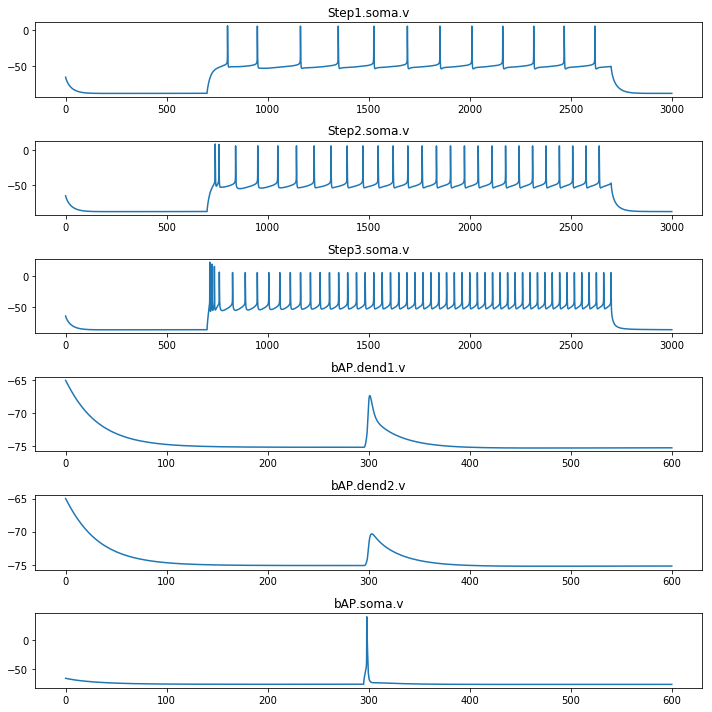

In [62]:
import matplotlib.pyplot as plt

def plot_responses(responses):
    fig, axes = plt.subplots(len(responses), figsize=(10,10))
    for index, (resp_name, response) in enumerate(sorted(responses.items())):
        axes[index].plot(response['time'], response['voltage'], label=resp_name)
        axes[index].set_title(resp_name)
    fig.tight_layout()
    fig.show()
plot_responses(release_responses)

Running an optimisation of the parameters now has become very easy. Of course running the L5PC optimisation will require quite some computing resources.

To show a proof-of-concept, we will only run 2 generations, with 2 offspring individuals per generations. If you want to run all full optimisation, you should run for 100 generations with an offspring size of 100 individuals. However, 
__don't run more than 10 generations__, because it can colaps the collab. You will see that already with 2 iterations 
the process takes several minutes.


In [65]:
opt = bpopt.optimisations.DEAPOptimisation(evaluator=evaluator, offspring_size=10)

final_pop, halloffame, log, hist = opt.run(max_ngen=2, cp_filename=working_directory + '/checkpoints/checkpoint.pkl')

'''
import pickle

cp = pickle.load(open('checkpoints/checkpoint.pkl'))

final_pop = cp['generation']
hist = cp['history']
halloffame = cp['halloffame']
log = cp['logbook']
'''

INFO:__main__:gen	nevals	avg    	std    	min    	max 
1  	10    	7216.13	2267.39	667.104	8600
2  	10    	7186.7 	2252.77	667.104	8600


"\nimport pickle\n\ncp = pickle.load(open('checkpoints/checkpoint.pkl'))\n\nfinal_pop = cp['generation']\nhist = cp['history']\nhalloffame = cp['halloffame']\nlog = cp['logbook']\n"

The first individual in the hall of fame will contain the best solution found.

In [66]:
print(halloffame[0])

[0.7887233511355132, 0.0938595867742349, 0.002834747652200631, 0.0008357651039198697, 0.004327670679050534, 0.03823286408166813, 22.06393228408848]


These are the raw parameter values. The evaluator object can convert this in a dictionary, so that we can see the parameter names corresponding to these values.

In [67]:
best_params = evaluator.param_dict(halloffame[0])
print(pp.pprint(best_params))

{ u'decay_CaDynamics_E2.somatic': 22.06393228408848,
  u'gCa_HVAbar_Ca_HVA.somatic': 0.0008357651039198697,
  u'gCa_LVAstbar_Ca_LVAst.somatic': 0.004327670679050534,
  u'gNaTs2_tbar_NaTs2_t.somatic': 0.7887233511355132,
  u'gSK_E2bar_SK_E2.somatic': 0.002834747652200631,
  u'gSKv3_1bar_SKv3_1.somatic': 0.0938595867742349,
  u'gamma_CaDynamics_E2.somatic': 0.03823286408166813}
None


Then we can run the fitness protocols on the model with these parameter values


In [68]:
best_responses = evaluator.run_protocols(protocols=fitness_protocols.values(), param_values=best_params)

And then we can also plot these responses.

When you ran the above optimisation with only 2 individuals and 2 generations, this 'best' model will of course be very low quality.


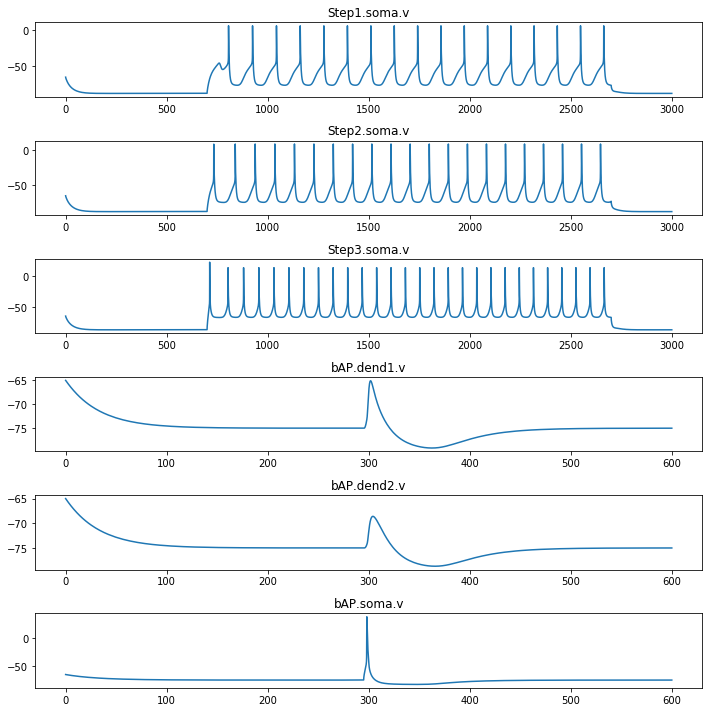

In [69]:
plot_responses(best_responses)

Let's visualize the objectives of the optimisation. First we need to create a dictionary of the responses of the best individual, that is the NEURON simulation of the voltage trace for each protocol with the parameters that correspond to the best individual. Remember that an individual is just a set of our model's parameters.

In [70]:
fitness_protocols = evaluator.fitness_protocols

responses = {}
nrn = ephys.simulators.NrnSimulator()
for protocol in fitness_protocols.values():
    response = protocol.run(
                            cell_model=opt.evaluator.cell_model,
                            param_values=best_params,
                            sim=nrn
                            )
    responses.update(response)

responses

{u'Step1.soma.v': <bluepyopt.ephys.responses.TimeVoltageResponse at 0x7fb6ac459750>,
 u'Step2.soma.v': <bluepyopt.ephys.responses.TimeVoltageResponse at 0x7fb6ac459ad0>,
 u'Step3.soma.v': <bluepyopt.ephys.responses.TimeVoltageResponse at 0x7fb6a6597890>,
 u'bAP.dend1.v': <bluepyopt.ephys.responses.TimeVoltageResponse at 0x7fb6a65977d0>,
 u'bAP.dend2.v': <bluepyopt.ephys.responses.TimeVoltageResponse at 0x7fb6ac459b10>,
 u'bAP.soma.v': <bluepyopt.ephys.responses.TimeVoltageResponse at 0x7fb6a6597390>}

Plot the objectives of the responses, that is the deviation (in standard deviations) of the features from the values in the input features.json file.

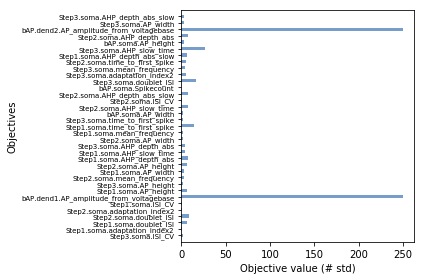

In [71]:
objectives = opt.evaluator.fitness_calculator.calculate_scores(responses)

f, ax = plt.subplots()

ytick_pos = [x + 0.5 for x in range(len(objectives.keys()))]
ax.barh(ytick_pos,
              objectives.values(),
              height=0.5,
              align='center',
              color='#779ECB')

ax.set_yticks(ytick_pos) 
ax.set_yticklabels(objectives.keys(), size='x-small') 
ax.set_ylim(-0.5, len(objectives.values()) + 0.5) 
ax.set_xlabel('Objective value (# std)') 
ax.set_ylabel('Objectives') 

plt.tight_layout()

Let's now plot the traces for all the individuals in the hall of fame. In other words, for each parameter set = individual let's plot the respective trace.

First we create a list for all the individuals, in a simimilar manner as above, but for all the individuals in the hall of fame this time.

In [72]:
hof_responses = []
for best_ind in halloffame:
    best_ind_dict = evaluator.param_dict(best_ind)
    hof_responses.append(evaluator.run_protocols(evaluator.fitness_protocols.values(),
                                             param_values=best_ind_dict))

Let's now plot the traces for all the individuals in the hall of fame. In other words, for each parameter set = individual let's plot the respective trace.

First we create a list for all the individuals, in a simimilar manner as above, but for all the individuals in the hall of fame this time.


In [73]:
hof_responses = []
for best_ind in halloffame:
    best_ind_dict = evaluator.param_dict(best_ind)
    hof_responses.append(evaluator.run_protocols(evaluator.fitness_protocols.values(),
                                             param_values=best_ind_dict))

In [74]:
traces = sorted(hof_responses[0].keys())

traces

[u'Step1.soma.v',
 u'Step2.soma.v',
 u'Step3.soma.v',
 u'bAP.dend1.v',
 u'bAP.dend2.v',
 u'bAP.soma.v']

Then we plot the traces with the best one in deep blue

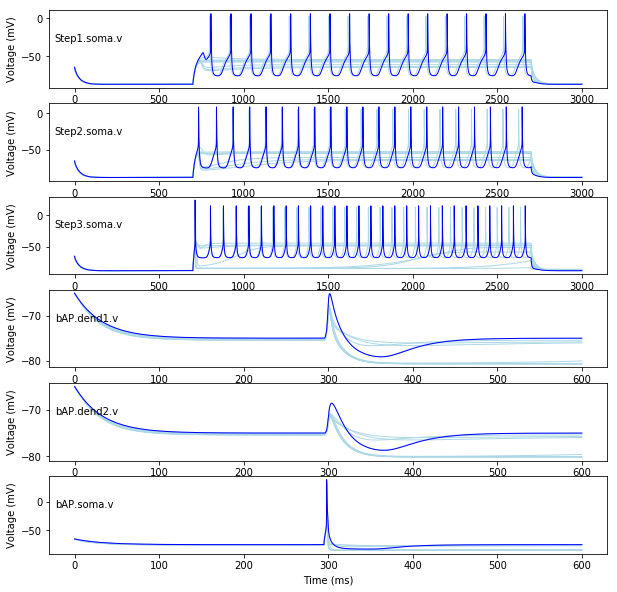

In [75]:
import numpy as np

def plot_multiple_responses(responses, fig):
    '''creates 6 subplots for step{1,2,3} and dAP traces, and plots all the responses on them'''

    plot_count = len(traces)
    
    # one subplot for each trace
    ax = [fig.add_subplot(plot_count, 1, i + 1) for i in range(plot_count)]

    # to color the last one deep blue
    overlay_count = len(responses)
    
    for index, trace in enumerate(traces):  
        for n, response in enumerate(reversed(responses)): # worst to best individual
            
            color='lightblue' if n < overlay_count - 1 else 'blue'
            
            ax[index].plot(response[trace]['time'],
                           response[trace]['voltage'],
                           color=color,
                           linewidth=1)

        # formatting of the subplots
        ax[index].set_xlabel('Time (ms)')
        ax[index].set_ylabel('Voltage (mV)')
        ax[index].text(0.01, 0.7, trace, transform=ax[index].transAxes, fontsize=10,
        verticalalignment='top')
        #ax[index].set_xlim(80, 200)
            

        
f = plt.figure(figsize=(10,10))
plot_multiple_responses(hof_responses, f)

In [76]:
responses

{u'Step1.soma.v': <bluepyopt.ephys.responses.TimeVoltageResponse at 0x7fb6ac459750>,
 u'Step2.soma.v': <bluepyopt.ephys.responses.TimeVoltageResponse at 0x7fb6ac459ad0>,
 u'Step3.soma.v': <bluepyopt.ephys.responses.TimeVoltageResponse at 0x7fb6a6597890>,
 u'bAP.dend1.v': <bluepyopt.ephys.responses.TimeVoltageResponse at 0x7fb6a65977d0>,
 u'bAP.dend2.v': <bluepyopt.ephys.responses.TimeVoltageResponse at 0x7fb6ac459b10>,
 u'bAP.soma.v': <bluepyopt.ephys.responses.TimeVoltageResponse at 0x7fb6a6597390>}

And finally the fitness function

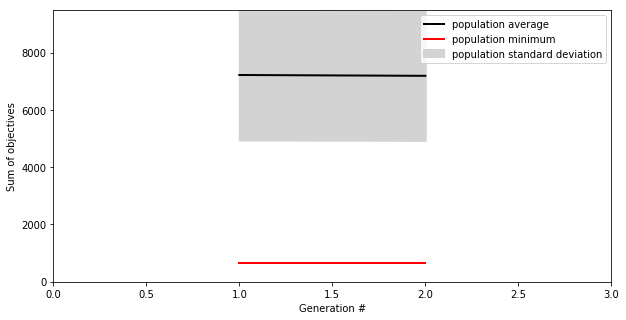

In [77]:
import numpy

logs=log
gen_numbers = log.select('gen')
min_fitness = numpy.array(log.select('min'))
max_fitness = log.select('max')
mean_fitness = numpy.array(log.select('avg'))
std_fitness = numpy.array(log.select('std'))

fig, ax = plt.subplots(1, figsize=(10, 5), facecolor='white')

std = std_fitness
mean = mean_fitness
minimum = min_fitness
stdminus = mean - std                                                           
stdplus = mean + std

ax.plot(                                                                      
    gen_numbers,                                                                
    mean,                                                                       
    color='black',                                                              
    linewidth=2,                                                                
    label='population average')                                                 

ax.fill_between(                                                              
    gen_numbers,                                                                
    stdminus,                                                                   
    stdplus,                                                                    
    color='lightgray',                                                          
    linewidth=2,                                                                
    label=r'population standard deviation')                                     

ax.plot(                                                                      
    gen_numbers,                                                                
    minimum,                                                                    
    color='red',                                                                
    linewidth=2,                                                                
    label='population minimum')                                                 

ax.set_xlim(min(gen_numbers) - 1, max(gen_numbers) + 1)                       
ax.set_xlabel('Generation #')                                                 
ax.set_ylabel('Sum of objectives')                                            
ax.set_ylim([0, max(stdplus)])                                                
ax.legend()                        


fig.show()
